In [15]:

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
# scaling
X_train = X_train / 255
X_test = X_test / 255

In [4]:
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
y_test = to_categorical(y_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
print("TRAIN SHAPE : ", X_train.shape)
print("TEST SHAPE : " ,y_train.shape)

TRAIN SHAPE :  (60000, 28, 28)
TEST SHAPE :  (60000, 10)


In [7]:
# but RBM needs 2d array so , 
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
print("TRAIN SHAPE : ", X_train.shape)
print("TEST SHAPE : " ,y_train.shape)

TRAIN SHAPE :  (60000, 784)
TEST SHAPE :  (60000, 10)


In [8]:
RBM = BernoulliRBM(n_components=392, learning_rate=0.05 ,batch_size= 100 , n_iter = 20 ,verbose=True , random_state=20)
RBM.fit(X_train , y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -238.84, time = 8.32s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -222.83, time = 12.77s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -215.60, time = 11.44s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -210.81, time = 11.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -213.69, time = 11.81s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -208.52, time = 11.32s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -208.87, time = 11.42s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -207.04, time = 11.80s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -202.97, time = 12.34s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -203.03, time = 11.90s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -202.09, time = 11.97s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -198.96, time = 11.52s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -201.48, time = 11.94s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -198.79, time = 11.74s
[B

BernoulliRBM(batch_size=100, learning_rate=0.05, n_components=392, n_iter=20,
             random_state=20, verbose=True)

In [9]:
# In the context of Restricted Boltzmann Machines (RBMs), pseudo-likelihood is a technique used for training and evaluating RBMs, especially when it is difficult or computationally expensive to compute the exact likelihood of the data given the model. RBMs are a type of generative neural network used for unsupervised learning and feature learning.

# The likelihood of data under an RBM is hard to compute exactly because it involves summing over all possible states of the hidden variables. Pseudo-likelihood offers an approximation to the likelihood that simplifies this calculation.

# Here's how pseudo-likelihood works in practical applications:

# Definition: Pseudo-likelihood is defined as the product of conditional probabilities for each visible unit being on, given the states of all other visible units. Mathematically, it can be expressed as:

# Pseudo-Likelihood(D) = ∏ [P(v_i = 1 | v_{\neg i})]

# Where v_i is a particular visible unit, and v_{\neg i} represents all other visible units except v_i.

# Training: During the training of the RBM, instead of trying to maximize the true likelihood of the data (which is computationally expensive), you maximize the pseudo-likelihood. The network is trained to predict the state of each visible unit based on the states of the other visible units.

# Sampling: In order to compute the pseudo-likelihood for each visible unit, you often perform Gibbs sampling, a Markov Chain Monte Carlo (MCMC) technique. This involves repeatedly sampling from the RBM to estimate the conditional probabilities in the product. It is computationally efficient compared to exact likelihood computation.

# Evaluation: Pseudo-likelihood can also be used to evaluate the performance of an RBM. You compare the likelihood of the data under the RBM with the likelihood under the true data distribution. A lower pseudo-likelihood indicates a worse fit of the model to the data.

# Pseudo-likelihood is a practical approximation that allows you to train and assess RBMs in a more computationally feasible manner. It may not be as accurate as exact likelihood, but it's often a good proxy for training and evaluating RBMs on real-world datasets. It's important to note that pseudo-likelihood is just one of many techniques used in RBM training and evaluation, and the choice of method may depend on the specific problem and computational resources available.

In [10]:
X_train_transformed = RBM.transform(X_train)
X_test_transformed = RBM.transform(X_test)

In [11]:
X_train_transformed[0].shape, X_train[0].shape

((392,), (784,))

In [13]:
model = Sequential()
model.add(Dense(50, activation='relu' ,kernel_regularizer = L1(0.01) ))
model.add(Dense(10 , activation='softmax'))
model.compile(loss='categorical_crossentropy'  , optimizer='adam' ,metrics='accuracy')
history = model.fit(X_train_transformed , y_train , verbose=1 , batch_size = 10 , validation_split=0.2 , epochs = 50)

Epoch 1/50
4800/4800 [==============================] - 17s 3ms/step - loss: 1.4620 - accuracy: 0.7421 - val_loss: 1.0317 - val_accuracy: 0.7772
Epoch 2/50
4800/4800 [==============================] - 14s 3ms/step - loss: 0.9927 - accuracy: 0.7678 - val_loss: 0.9379 - val_accuracy: 0.7757
Epoch 3/50
4800/4800 [==============================] - 13s 3ms/step - loss: 0.9216 - accuracy: 0.7745 - val_loss: 0.8720 - val_accuracy: 0.7876
Epoch 4/50
4800/4800 [==============================] - 13s 3ms/step - loss: 0.8943 - accuracy: 0.7814 - val_loss: 0.8798 - val_accuracy: 0.7837
Epoch 5/50
4800/4800 [==============================] - 12s 3ms/step - loss: 0.8721 - accuracy: 0.7849 - val_loss: 0.8141 - val_accuracy: 0.8018
Epoch 6/50
4800/4800 [==============================] - 12s 3ms/step - loss: 0.8666 - accuracy: 0.7838 - val_loss: 0.8400 - val_accuracy: 0.7877
Epoch 7/50
4800/4800 [==============================] - 14s 3ms/step - loss: 0.8514 - accuracy: 0.7860 - val_loss: 0.8065 - val_ac

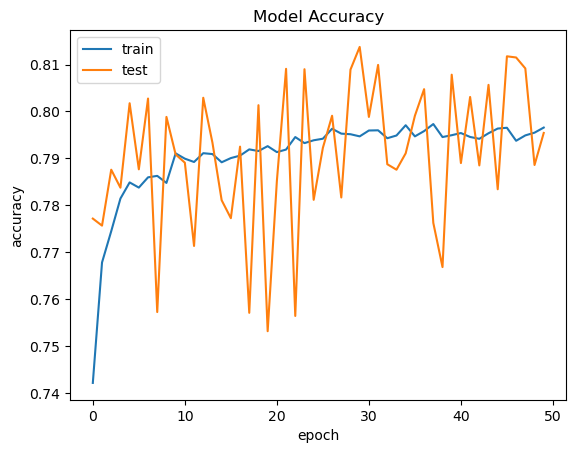

In [16]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

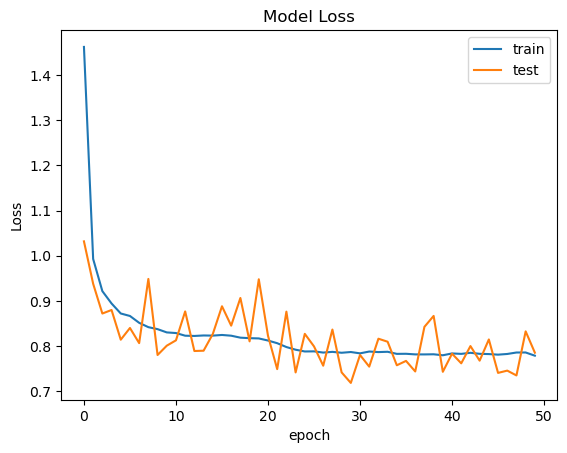

In [17]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [18]:
# training score
train_score = model.evaluate(X_train_transformed , y_train)
print("\n","train score = ",train_score ,"\n" , "*"*100)

# testing score
test_score = model.evaluate(X_test_transformed , y_test)
print("\n","test score = ",test_score ,"\n" , "*"*100)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.7854 - accuracy: 0.7957

 train score =  [0.7854130268096924, 0.7957333326339722] 
 ****************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 0.8042 - accuracy: 0.7876

 test score =  [0.8041988611221313, 0.7875999808311462] 
 ****************************************************************************************************


In [19]:
pred = model.predict(X_test_transformed)

313/313 [==============================] - 0s 1ms/step


In [20]:
def check(x):
    for i in y_test[x]:
        i = round(i)
        print(i," ",end="")
    
    print("\n")

    for i in pred[x]:
        i = round(i)
        print(i," ",end="")

        
        
        

In [21]:
for x in range(len(pred)):
    for i in y_test[x]:
        i = round(i)
        print(i," ",end="")
    
    print("\n")

    for i in pred[x]:
        i = round(i)
        print(i," ",end="")
        
    print("\n")
    print("*"*100)


0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
1  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
1  0  0  0  0  0  0  0  0  0  

1  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
1  0  0  0  0  0  0  0  0  0  

1  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0